In [155]:
import matplotlib as mp
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.mixture import GaussianMixture

In [103]:
mp.rcParams['figure.figsize'] = (12, 8)

# A scikit demo of Gaussian Mixture Model
http://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_pdf.html

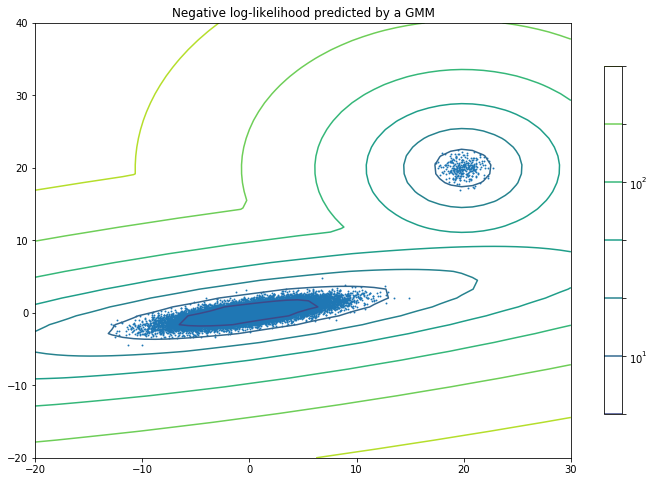

In [173]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from sklearn import mixture

n_samples = 300

# generate random sample, two components
np.random.seed(0)

# generate spherical data centered on (20, 20)
shifted_gaussian = np.random.randn(n_samples, 2) + np.array([20, 20])

# generate zero centered stretched Gaussian data
C = np.array([[0., -0.7], [3.5, .7]])
stretched_gaussian = np.dot(np.random.randn(n_samples*100, 2), C)

# concatenate the two datasets into the final training set
X_train = np.vstack([shifted_gaussian, stretched_gaussian])

# fit a Gaussian Mixture Model with two components
clf = mixture.GaussianMixture(n_components=2, covariance_type='full')
clf.fit(X_train)

# display predicted scores by the model as a contour plot
x = np.linspace(-20., 30.)
y = np.linspace(-20., 40.)
X, Y = np.meshgrid(x, y)
XX = np.array([X.ravel(), Y.ravel()]).T
Z = -clf.score_samples(XX)
Z = Z.reshape(X.shape)

CS = plt.contour(X, Y, Z, norm=LogNorm(vmin=1.0, vmax=1000.0),
                 levels=np.logspace(0, 3, 10))
CB = plt.colorbar(CS, shrink=0.8, extend='both')
plt.scatter(X_train[:, 0], X_train[:, 1], .8)

plt.title('Negative log-likelihood predicted by a GMM')
plt.axis('tight')
plt.show()

# A simple star cluster 

simulated data [ ra dec, pmra, pmdec] 
* field stars ~ Normal
* cluster stars ~ Normal

To be refined as in a typical Gaia DR2 cluster selection the field stars are more likely only a subset of a Normal distribution because of the cut in position and proper motion

In [104]:
mean_f = np.array([0,0,0,0])
cov_f = np.array([[1,0,0,0],[0,1,0,0],[0,0,1,0.5],[0,0,0.5,1]])
fields = np.random.multivariate_normal(mean_f,cov=cov_f,size=10000)
f = pd.DataFrame(fields,columns=['ra','dec','pmra','pmdec'])
f['label'] = "field"

mean_c = np.array([0.1,0.1,2,1])
cov_c = np.array([[0.1,0,0,0],[0,0.1,0,0],[0,0,0.01,-0.005],[0,0,-0.005,0.01]])
cluster = np.random.multivariate_normal(mean_c,cov=cov_c,size=100)
c = pd.DataFrame(cluster,columns=['ra','dec','pmra','pmdec'])
c['label'] = "cluster"

In [105]:
d = pd.concat([f,c])

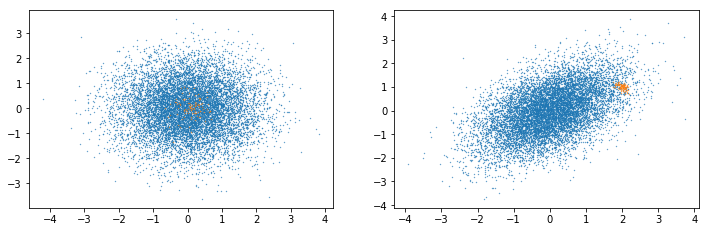

In [106]:
plt.subplot(221)
plt.scatter(f.ra,f.dec,s=0.1)
plt.scatter(c.ra,c.dec,s=0.1)
plt.subplot(222)
plt.scatter(f.pmra,f.pmdec,s=0.1)
plt.scatter(c.pmra,c.pmdec,s=0.1)

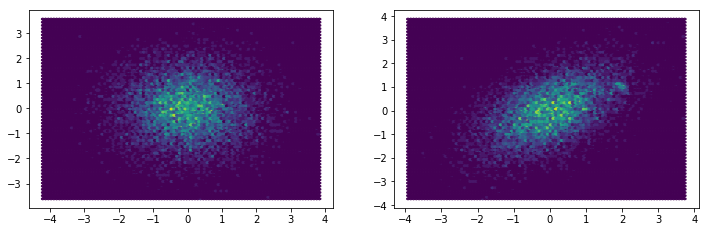

In [110]:
plt.subplot(221)
plt.hexbin(d.ra,d.dec)
plt.subplot(222)
plt.hexbin(d.pmra,d.pmdec)

In [157]:
X = d[['ra','dec','pmra','pmdec']].values
c0 = GaussianMixture().fit(X)

In [162]:
GM = GaussianMixture(n_components=2,covariance_type='full', max_iter=20, random_state=0)
GM.fit(X)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=20,
        means_init=None, n_components=2, n_init=1, precisions_init=None,
        random_state=0, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

In [164]:
GM.covariances_

array([[[ 1.02503309, -0.02339579, -0.00709172, -0.00705568],
        [-0.02339579,  0.99520013, -0.00732244,  0.02313163],
        [-0.00709172, -0.00732244,  0.70763711,  0.22682302],
        [-0.00705568,  0.02313163,  0.22682302,  0.73808871]],

       [[ 0.98850067,  0.02706234,  0.00703268,  0.01513066],
        [ 0.02706234,  0.96555405,  0.00618272, -0.01652333],
        [ 0.00703268,  0.00618272,  0.74701568,  0.23341141],
        [ 0.01513066, -0.01652333,  0.23341141,  0.68868147]]])

In [166]:
print(mean_c,mean_f)

[0.1 0.1 2.  1. ] [0 0 0 0]


In [165]:
GM.means_

array([[ 0.04649122,  0.01725133, -0.47527674, -0.51359936],
       [-0.0173793 , -0.02888386,  0.56121026,  0.5602413 ]])

# Quick check with clustering algorithms

note one should split the data into training and test samples

In [114]:
from sklearn.cluster import KMeans,DBSCAN,SpectralClustering
from sklearn.preprocessing import StandardScaler

In [181]:
X = d[['ra','dec','pmra','pmdec']].values
X = StandardScaler().fit_transform(X)
c1 = KMeans(n_clusters=3, random_state=0).fit(X)
c2 = DBSCAN(eps=0.5, min_samples=50).fit(X)

In [182]:
DBSCAN?

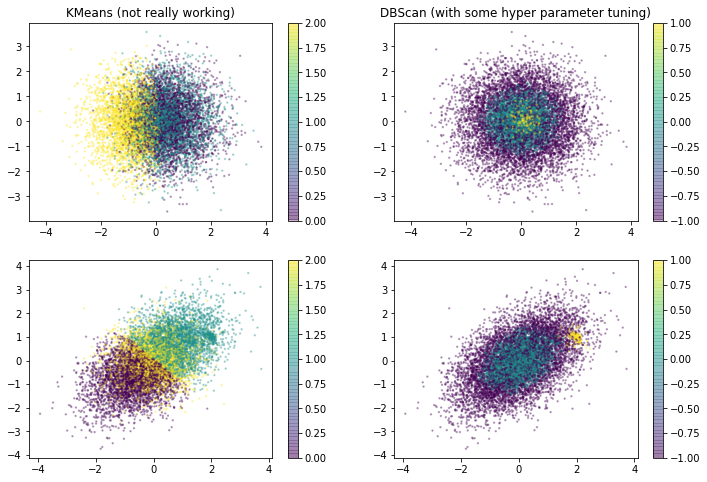

In [185]:
plt.subplot(221)
plt.scatter(d.ra,d.dec,c=c1.labels_,alpha=0.3,s=2)
plt.colorbar()
plt.title("KMeans (not really working)")
plt.subplot(223)
plt.scatter(d.pmra,d.pmdec,c=c1.labels_,alpha=0.3,s=2)
plt.colorbar()
plt.subplot(222)
plt.scatter(d.ra,d.dec,c=c2.labels_,alpha=0.3,s=2)
plt.colorbar()
plt.title("DBScan (with some hyper parameter tuning)")
plt.subplot(224)
plt.scatter(d.pmra,d.pmdec,c=c2.labels_,alpha=0.3,s=2)
plt.colorbar()

In [186]:
d[c2.labels_==1].groupby('label').count()

,ra,dec,pmra,pmdec
label,,,,
cluster,94,94,94,94
field,56,56,56,56
